In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn


In [3]:

device = 'cuda'
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

testset = torchvision.datasets.MNIST('mnist',
                                      train = False,
                                      download=True,
                                      transform=transform)

In [6]:
testloader = torch.utils.data.DataLoader(testset,
                                          batch_size=128,
                                          shuffle=False,
                                          num_workers=0)

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imgshow(title='',image = None , size = 6):
    w,h = image.shape[0],image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.show()


In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,32,3)
        self.conv2 = nn.Conv2d(32,64,3)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64*12*12,128)
        self.fc2 = nn.Linear(128,10)

    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,64*12*12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x
net = Net()
net.to(device)

net.load_state_dict(torch.load('mnist_cnn_net.pth'))

<All keys matched successfully>

In [15]:
correct =0
total = 0
with torch.no_grad():
    for data in testloader:
        image,label = data
        images = image.to(device)
        labels = label.to(device)

        output = net(images)

        _,predicted = torch.max(output.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = 100*correct/total

print(f"Accuracy in 10k images: {accuracy:.4}%")

Accuracy in 10k images: 95.99%


Actual Label: 5 , Predicted Label : 6


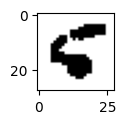

Actual Label: 7 , Predicted Label : 4


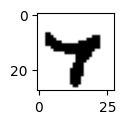

Actual Label: 2 , Predicted Label : 9


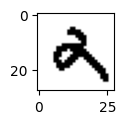

Actual Label: 9 , Predicted Label : 8


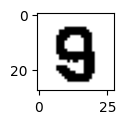

Actual Label: 4 , Predicted Label : 6


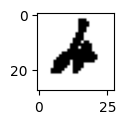

Actual Label: 6 , Predicted Label : 0


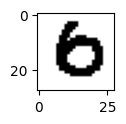

Actual Label: 2 , Predicted Label : 3


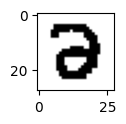

Actual Label: 9 , Predicted Label : 7


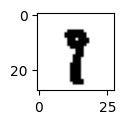

Actual Label: 2 , Predicted Label : 7


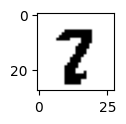

Actual Label: 5 , Predicted Label : 3


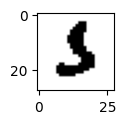

Actual Label: 2 , Predicted Label : 7


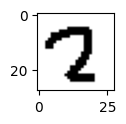

Actual Label: 6 , Predicted Label : 0


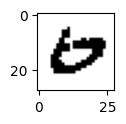

Actual Label: 9 , Predicted Label : 8


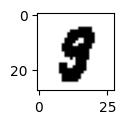

Actual Label: 3 , Predicted Label : 5


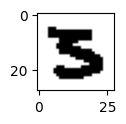

Actual Label: 8 , Predicted Label : 0


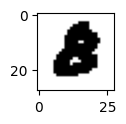

Actual Label: 3 , Predicted Label : 5


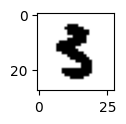

Actual Label: 7 , Predicted Label : 3


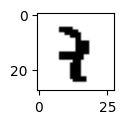

Actual Label: 4 , Predicted Label : 9


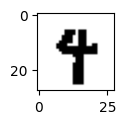

Actual Label: 3 , Predicted Label : 2


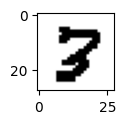

Actual Label: 2 , Predicted Label : 8


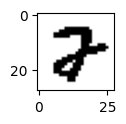

Actual Label: 8 , Predicted Label : 3


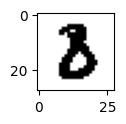

Actual Label: 2 , Predicted Label : 8


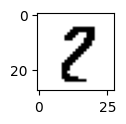

Actual Label: 1 , Predicted Label : 8


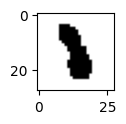

Actual Label: 3 , Predicted Label : 9


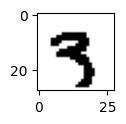

Actual Label: 2 , Predicted Label : 8


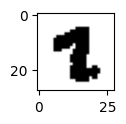

Actual Label: 7 , Predicted Label : 2


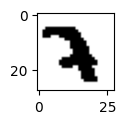

Actual Label: 8 , Predicted Label : 4


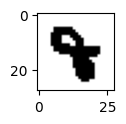

Actual Label: 4 , Predicted Label : 9


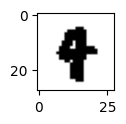

Actual Label: 0 , Predicted Label : 6


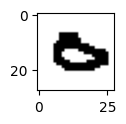

Actual Label: 5 , Predicted Label : 8


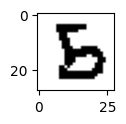

Actual Label: 4 , Predicted Label : 9


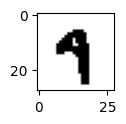

Actual Label: 4 , Predicted Label : 9


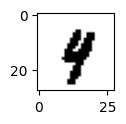

Actual Label: 5 , Predicted Label : 9


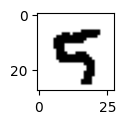

Actual Label: 8 , Predicted Label : 3


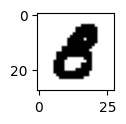

Actual Label: 8 , Predicted Label : 7


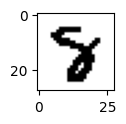

Actual Label: 4 , Predicted Label : 9


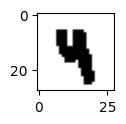

Actual Label: 9 , Predicted Label : 7


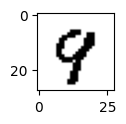

Actual Label: 3 , Predicted Label : 5


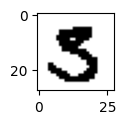

Actual Label: 8 , Predicted Label : 9


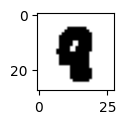

Actual Label: 7 , Predicted Label : 2


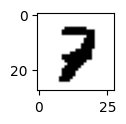

Actual Label: 1 , Predicted Label : 2


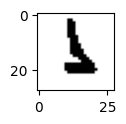

Actual Label: 4 , Predicted Label : 9


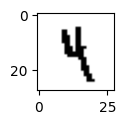

Actual Label: 6 , Predicted Label : 0


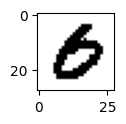

Actual Label: 5 , Predicted Label : 3


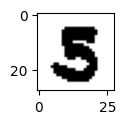

Actual Label: 6 , Predicted Label : 5


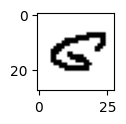

Actual Label: 7 , Predicted Label : 9


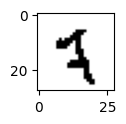

Actual Label: 6 , Predicted Label : 8


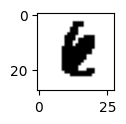

Actual Label: 3 , Predicted Label : 9


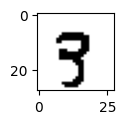

Actual Label: 8 , Predicted Label : 4


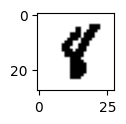

Actual Label: 9 , Predicted Label : 3


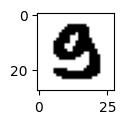

Actual Label: 4 , Predicted Label : 6


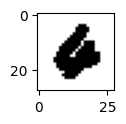

Actual Label: 3 , Predicted Label : 8


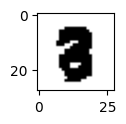

Actual Label: 7 , Predicted Label : 9


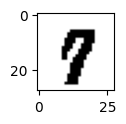

Actual Label: 6 , Predicted Label : 8


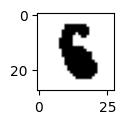

Actual Label: 7 , Predicted Label : 9


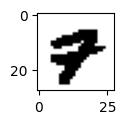

Actual Label: 7 , Predicted Label : 2


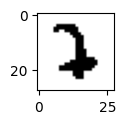

Actual Label: 9 , Predicted Label : 4


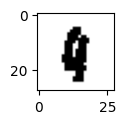

Actual Label: 4 , Predicted Label : 9


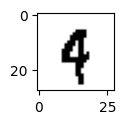

Actual Label: 9 , Predicted Label : 5


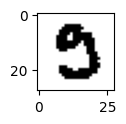

Actual Label: 2 , Predicted Label : 0


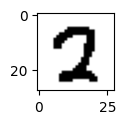

Actual Label: 7 , Predicted Label : 1


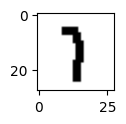

Actual Label: 7 , Predicted Label : 2


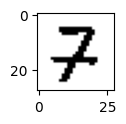

Actual Label: 5 , Predicted Label : 9


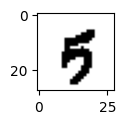

Actual Label: 5 , Predicted Label : 7


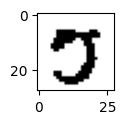

Actual Label: 8 , Predicted Label : 3


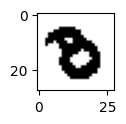

Actual Label: 7 , Predicted Label : 2


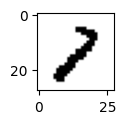

Actual Label: 2 , Predicted Label : 6


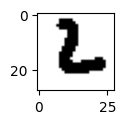

Actual Label: 5 , Predicted Label : 3


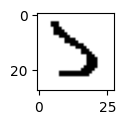

Actual Label: 1 , Predicted Label : 8


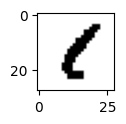

Actual Label: 4 , Predicted Label : 9


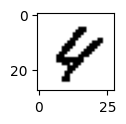

Actual Label: 7 , Predicted Label : 9


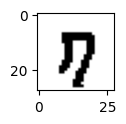

Actual Label: 7 , Predicted Label : 1


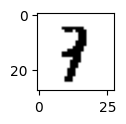

Actual Label: 7 , Predicted Label : 9


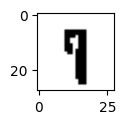

Actual Label: 1 , Predicted Label : 6


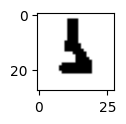

Actual Label: 8 , Predicted Label : 7


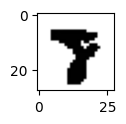

Actual Label: 4 , Predicted Label : 6


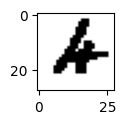

Actual Label: 9 , Predicted Label : 8


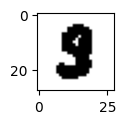

Actual Label: 6 , Predicted Label : 4


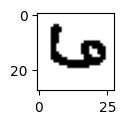

Actual Label: 7 , Predicted Label : 9


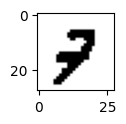

Actual Label: 6 , Predicted Label : 5


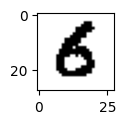

Actual Label: 2 , Predicted Label : 6


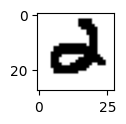

Actual Label: 4 , Predicted Label : 7


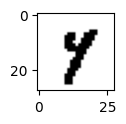

Actual Label: 2 , Predicted Label : 0


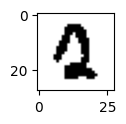

Actual Label: 3 , Predicted Label : 7


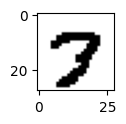

Actual Label: 9 , Predicted Label : 5


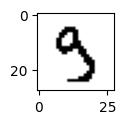

Actual Label: 8 , Predicted Label : 0


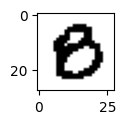

Actual Label: 7 , Predicted Label : 3


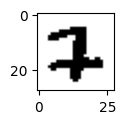

Actual Label: 1 , Predicted Label : 6


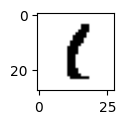

Actual Label: 2 , Predicted Label : 9


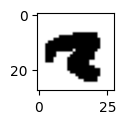

Actual Label: 6 , Predicted Label : 4


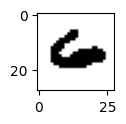

Actual Label: 3 , Predicted Label : 7


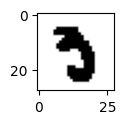

Actual Label: 8 , Predicted Label : 3


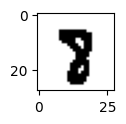

Actual Label: 4 , Predicted Label : 9


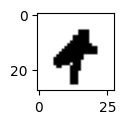

Actual Label: 1 , Predicted Label : 4


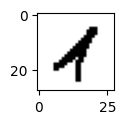

Actual Label: 8 , Predicted Label : 3


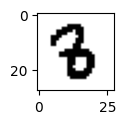

Actual Label: 9 , Predicted Label : 4


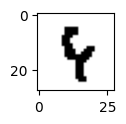

Actual Label: 5 , Predicted Label : 0


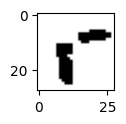

Actual Label: 9 , Predicted Label : 5


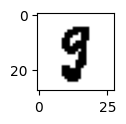

Actual Label: 2 , Predicted Label : 0


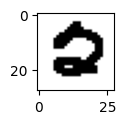

Actual Label: 7 , Predicted Label : 2


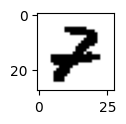

Actual Label: 7 , Predicted Label : 9


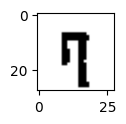

Actual Label: 5 , Predicted Label : 3


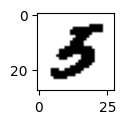

Actual Label: 5 , Predicted Label : 4


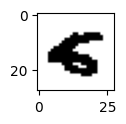

Actual Label: 4 , Predicted Label : 8


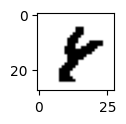

Actual Label: 2 , Predicted Label : 7


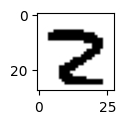

Actual Label: 4 , Predicted Label : 9


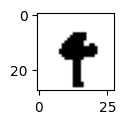

Actual Label: 7 , Predicted Label : 9


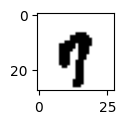

Actual Label: 2 , Predicted Label : 0


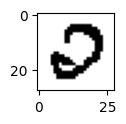

Actual Label: 3 , Predicted Label : 5


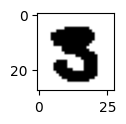

Actual Label: 8 , Predicted Label : 0


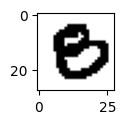

Actual Label: 3 , Predicted Label : 7


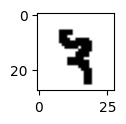

Actual Label: 6 , Predicted Label : 0


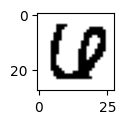

Actual Label: 9 , Predicted Label : 8


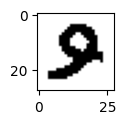

Actual Label: 4 , Predicted Label : 9


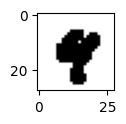

Actual Label: 6 , Predicted Label : 1


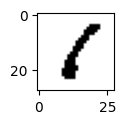

Actual Label: 1 , Predicted Label : 2


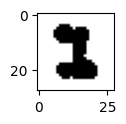

Actual Label: 2 , Predicted Label : 3


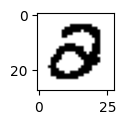

Actual Label: 9 , Predicted Label : 1


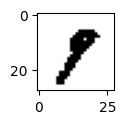

Actual Label: 6 , Predicted Label : 5


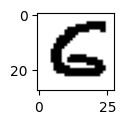

Actual Label: 5 , Predicted Label : 8


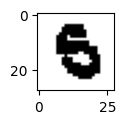

Actual Label: 1 , Predicted Label : 6


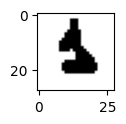

Actual Label: 8 , Predicted Label : 0


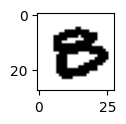

Actual Label: 9 , Predicted Label : 6


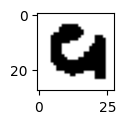

Actual Label: 2 , Predicted Label : 7


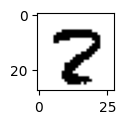

Actual Label: 7 , Predicted Label : 2


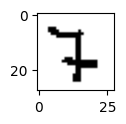

Actual Label: 5 , Predicted Label : 9


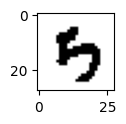

Actual Label: 4 , Predicted Label : 9


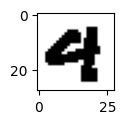

Actual Label: 9 , Predicted Label : 1


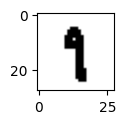

Actual Label: 8 , Predicted Label : 3


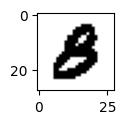

Actual Label: 9 , Predicted Label : 1


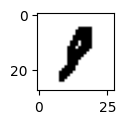

Actual Label: 3 , Predicted Label : 9


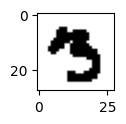

Actual Label: 6 , Predicted Label : 4


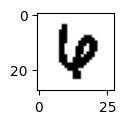

Actual Label: 4 , Predicted Label : 9


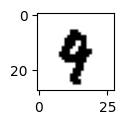

Actual Label: 6 , Predicted Label : 8


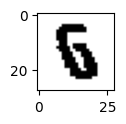

Actual Label: 2 , Predicted Label : 0


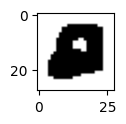

Actual Label: 1 , Predicted Label : 8


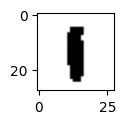

Actual Label: 2 , Predicted Label : 4


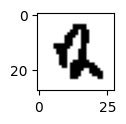

Actual Label: 5 , Predicted Label : 8


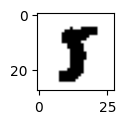

Actual Label: 7 , Predicted Label : 3


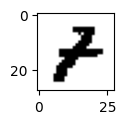

Actual Label: 9 , Predicted Label : 0


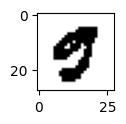

Actual Label: 6 , Predicted Label : 1


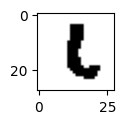

Actual Label: 1 , Predicted Label : 8


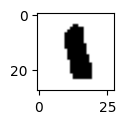

Actual Label: 4 , Predicted Label : 9


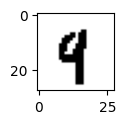

Actual Label: 2 , Predicted Label : 3


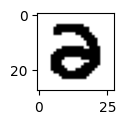

Actual Label: 8 , Predicted Label : 0


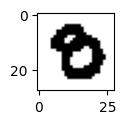

Actual Label: 3 , Predicted Label : 5


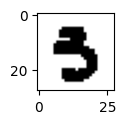

Actual Label: 5 , Predicted Label : 9


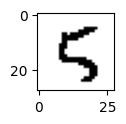

Actual Label: 5 , Predicted Label : 0


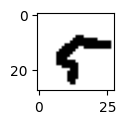

Actual Label: 3 , Predicted Label : 2


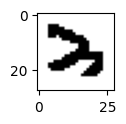

Actual Label: 3 , Predicted Label : 7


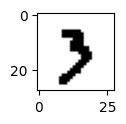

Actual Label: 3 , Predicted Label : 5


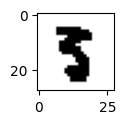

Actual Label: 6 , Predicted Label : 8


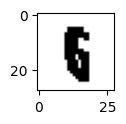

Actual Label: 9 , Predicted Label : 8


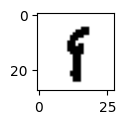

Actual Label: 2 , Predicted Label : 7


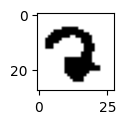

Actual Label: 9 , Predicted Label : 7


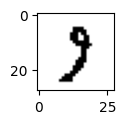

Actual Label: 1 , Predicted Label : 2


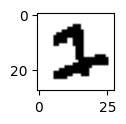

Actual Label: 5 , Predicted Label : 9


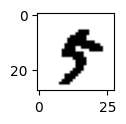

Actual Label: 6 , Predicted Label : 0


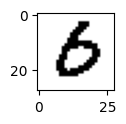

Actual Label: 1 , Predicted Label : 2


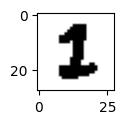

Actual Label: 7 , Predicted Label : 9


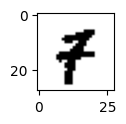

Actual Label: 5 , Predicted Label : 9


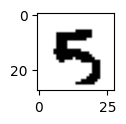

Actual Label: 8 , Predicted Label : 3


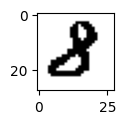

Actual Label: 9 , Predicted Label : 8


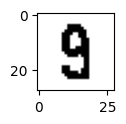

Actual Label: 6 , Predicted Label : 0


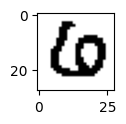

Actual Label: 2 , Predicted Label : 3


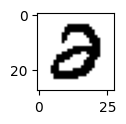

Actual Label: 7 , Predicted Label : 9


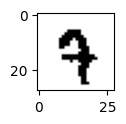

Actual Label: 7 , Predicted Label : 9


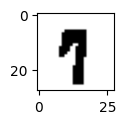

Actual Label: 4 , Predicted Label : 9


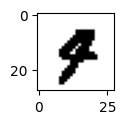

Actual Label: 6 , Predicted Label : 0


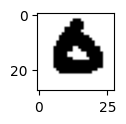

Actual Label: 6 , Predicted Label : 4


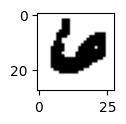

Actual Label: 3 , Predicted Label : 7


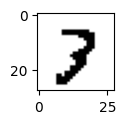

Actual Label: 4 , Predicted Label : 9


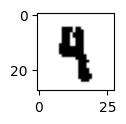

Actual Label: 9 , Predicted Label : 1


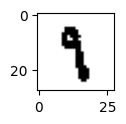

Actual Label: 6 , Predicted Label : 4


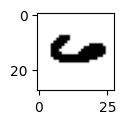

Actual Label: 6 , Predicted Label : 5


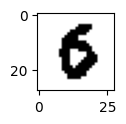

Actual Label: 5 , Predicted Label : 0


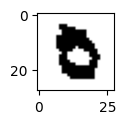

Actual Label: 8 , Predicted Label : 5


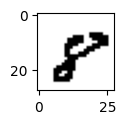

Actual Label: 7 , Predicted Label : 9


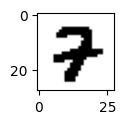

Actual Label: 9 , Predicted Label : 3


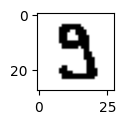

Actual Label: 8 , Predicted Label : 3


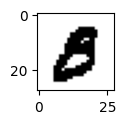

Actual Label: 8 , Predicted Label : 0


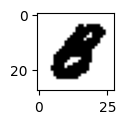

Actual Label: 2 , Predicted Label : 3


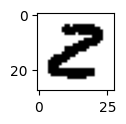

Actual Label: 4 , Predicted Label : 9


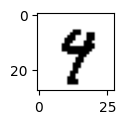

Actual Label: 4 , Predicted Label : 9


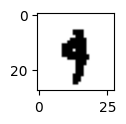

Actual Label: 7 , Predicted Label : 2


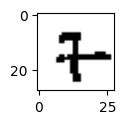

Actual Label: 8 , Predicted Label : 3


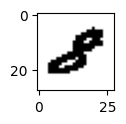

Actual Label: 7 , Predicted Label : 2


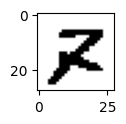

Actual Label: 5 , Predicted Label : 8


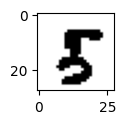

Actual Label: 4 , Predicted Label : 6


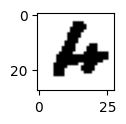

Actual Label: 2 , Predicted Label : 8


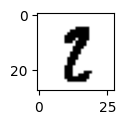

Actual Label: 7 , Predicted Label : 3


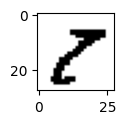

Actual Label: 2 , Predicted Label : 3


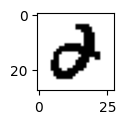

Actual Label: 7 , Predicted Label : 9


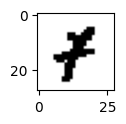

Actual Label: 7 , Predicted Label : 3


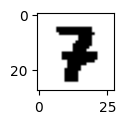

Actual Label: 6 , Predicted Label : 5


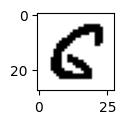

Actual Label: 5 , Predicted Label : 0


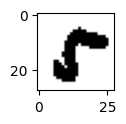

Actual Label: 5 , Predicted Label : 6


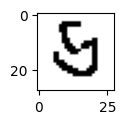

Actual Label: 5 , Predicted Label : 3


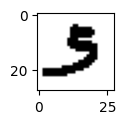

Actual Label: 1 , Predicted Label : 3


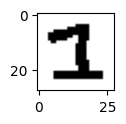

Actual Label: 9 , Predicted Label : 3


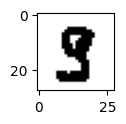

Actual Label: 4 , Predicted Label : 6


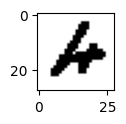

Actual Label: 3 , Predicted Label : 5


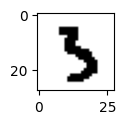

Actual Label: 8 , Predicted Label : 5


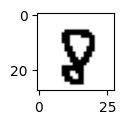

Actual Label: 3 , Predicted Label : 2


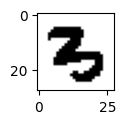

Actual Label: 9 , Predicted Label : 4


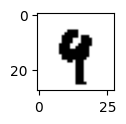

Actual Label: 4 , Predicted Label : 9


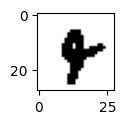

Actual Label: 6 , Predicted Label : 5


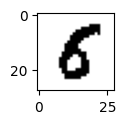

Actual Label: 0 , Predicted Label : 9


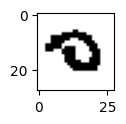

Actual Label: 8 , Predicted Label : 0


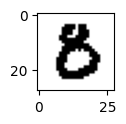

Actual Label: 9 , Predicted Label : 3


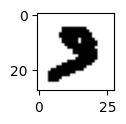

Actual Label: 9 , Predicted Label : 4


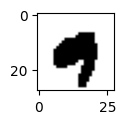

Actual Label: 8 , Predicted Label : 2


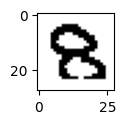

Actual Label: 5 , Predicted Label : 1


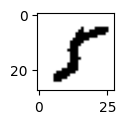

Actual Label: 9 , Predicted Label : 0


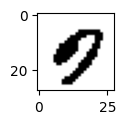

Actual Label: 2 , Predicted Label : 6


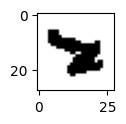

Actual Label: 1 , Predicted Label : 7


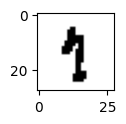

Actual Label: 2 , Predicted Label : 6


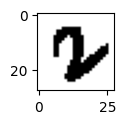

Actual Label: 6 , Predicted Label : 5


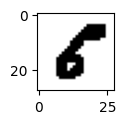

Actual Label: 1 , Predicted Label : 3


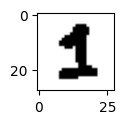

Actual Label: 9 , Predicted Label : 7


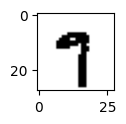

Actual Label: 7 , Predicted Label : 9


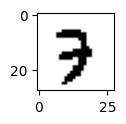

Actual Label: 2 , Predicted Label : 8


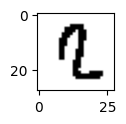

Actual Label: 4 , Predicted Label : 9


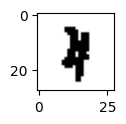

Actual Label: 2 , Predicted Label : 7


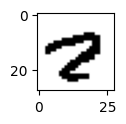

Actual Label: 5 , Predicted Label : 8


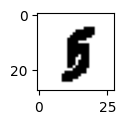

Actual Label: 3 , Predicted Label : 7


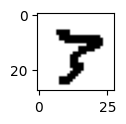

Actual Label: 4 , Predicted Label : 9


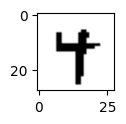

Actual Label: 5 , Predicted Label : 8


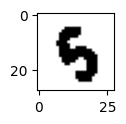

Actual Label: 5 , Predicted Label : 9


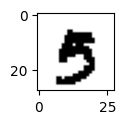

Actual Label: 5 , Predicted Label : 8


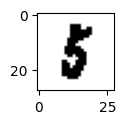

Actual Label: 9 , Predicted Label : 4


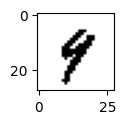

Actual Label: 7 , Predicted Label : 3


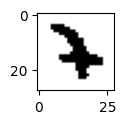

Actual Label: 3 , Predicted Label : 7


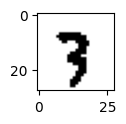

Actual Label: 6 , Predicted Label : 0


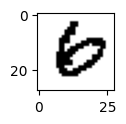

Actual Label: 0 , Predicted Label : 6


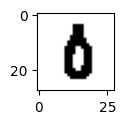

Actual Label: 9 , Predicted Label : 1


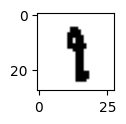

Actual Label: 6 , Predicted Label : 5


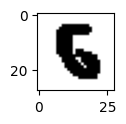

Actual Label: 7 , Predicted Label : 9


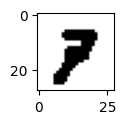

Actual Label: 4 , Predicted Label : 9


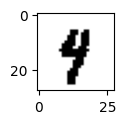

Actual Label: 6 , Predicted Label : 8


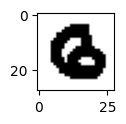

Actual Label: 4 , Predicted Label : 2


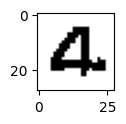

Actual Label: 7 , Predicted Label : 9


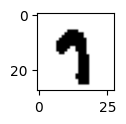

Actual Label: 8 , Predicted Label : 4


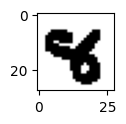

Actual Label: 2 , Predicted Label : 4


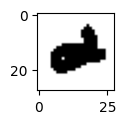

Actual Label: 8 , Predicted Label : 9


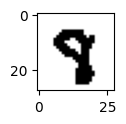

Actual Label: 8 , Predicted Label : 7


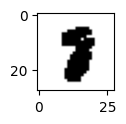

Actual Label: 9 , Predicted Label : 4


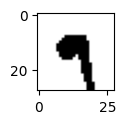

Actual Label: 3 , Predicted Label : 5


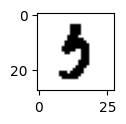

Actual Label: 4 , Predicted Label : 6


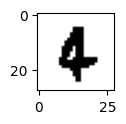

Actual Label: 9 , Predicted Label : 8


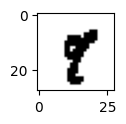

Actual Label: 8 , Predicted Label : 0


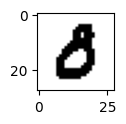

Actual Label: 3 , Predicted Label : 5


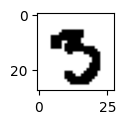

Actual Label: 6 , Predicted Label : 0


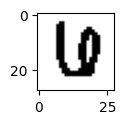

Actual Label: 9 , Predicted Label : 4


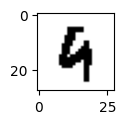

Actual Label: 4 , Predicted Label : 9


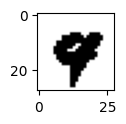

Actual Label: 2 , Predicted Label : 4


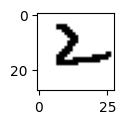

Actual Label: 0 , Predicted Label : 8


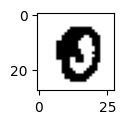

Actual Label: 7 , Predicted Label : 8


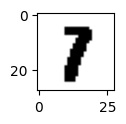

Actual Label: 2 , Predicted Label : 8


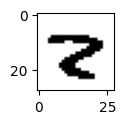

Actual Label: 2 , Predicted Label : 3


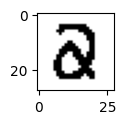

Actual Label: 8 , Predicted Label : 4


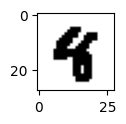

Actual Label: 7 , Predicted Label : 9


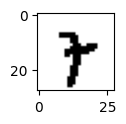

Actual Label: 3 , Predicted Label : 8


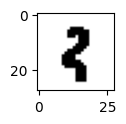

Actual Label: 3 , Predicted Label : 0


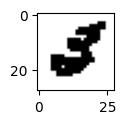

Actual Label: 8 , Predicted Label : 0


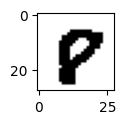

Actual Label: 1 , Predicted Label : 6


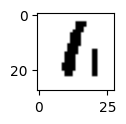

Actual Label: 7 , Predicted Label : 9


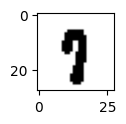

Actual Label: 8 , Predicted Label : 6


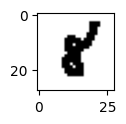

Actual Label: 2 , Predicted Label : 3


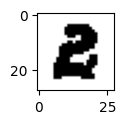

Actual Label: 1 , Predicted Label : 5


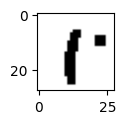

Actual Label: 3 , Predicted Label : 9


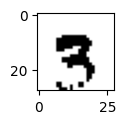

Actual Label: 5 , Predicted Label : 6


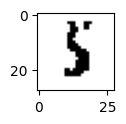

Actual Label: 8 , Predicted Label : 6


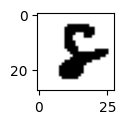

Actual Label: 7 , Predicted Label : 9


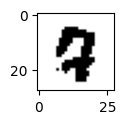

Actual Label: 4 , Predicted Label : 7


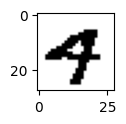

Actual Label: 7 , Predicted Label : 9


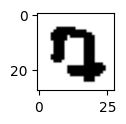

Actual Label: 4 , Predicted Label : 0


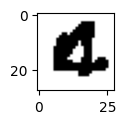

Actual Label: 5 , Predicted Label : 3


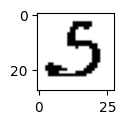

Actual Label: 4 , Predicted Label : 9


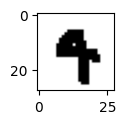

Actual Label: 3 , Predicted Label : 8


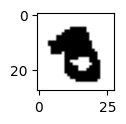

Actual Label: 3 , Predicted Label : 8


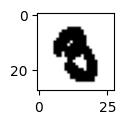

Actual Label: 5 , Predicted Label : 8


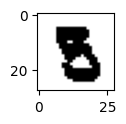

Actual Label: 2 , Predicted Label : 0


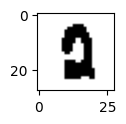

Actual Label: 4 , Predicted Label : 9


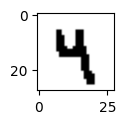

Actual Label: 3 , Predicted Label : 9


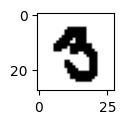

Actual Label: 3 , Predicted Label : 8


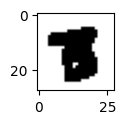

Actual Label: 9 , Predicted Label : 3


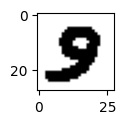

Actual Label: 9 , Predicted Label : 8


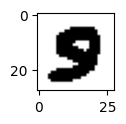

Actual Label: 1 , Predicted Label : 8


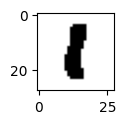

Actual Label: 9 , Predicted Label : 8


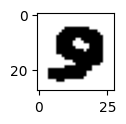

Actual Label: 2 , Predicted Label : 8


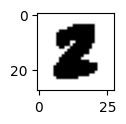

Actual Label: 1 , Predicted Label : 8


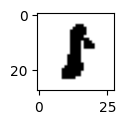

Actual Label: 9 , Predicted Label : 0


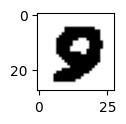

Actual Label: 9 , Predicted Label : 3


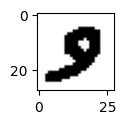

Actual Label: 9 , Predicted Label : 0


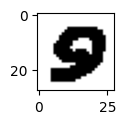

Actual Label: 9 , Predicted Label : 0


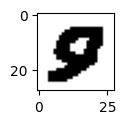

Actual Label: 3 , Predicted Label : 5


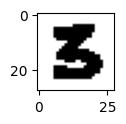

Actual Label: 2 , Predicted Label : 6


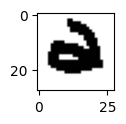

Actual Label: 9 , Predicted Label : 0


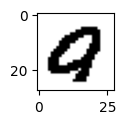

Actual Label: 8 , Predicted Label : 7


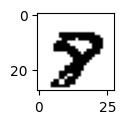

Actual Label: 3 , Predicted Label : 9


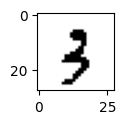

Actual Label: 9 , Predicted Label : 7


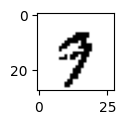

Actual Label: 2 , Predicted Label : 6


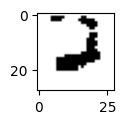

Actual Label: 0 , Predicted Label : 7


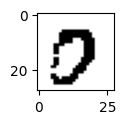

Actual Label: 5 , Predicted Label : 3


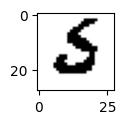

Actual Label: 8 , Predicted Label : 7


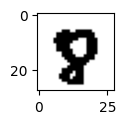

Actual Label: 8 , Predicted Label : 5


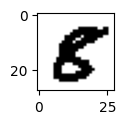

Actual Label: 0 , Predicted Label : 5


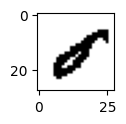

Actual Label: 2 , Predicted Label : 9


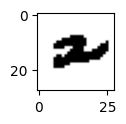

Actual Label: 2 , Predicted Label : 8


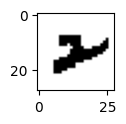

Actual Label: 4 , Predicted Label : 9


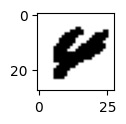

Actual Label: 1 , Predicted Label : 6


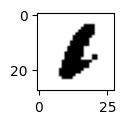

Actual Label: 2 , Predicted Label : 4


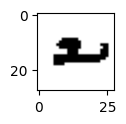

Actual Label: 2 , Predicted Label : 7


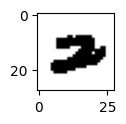

Actual Label: 6 , Predicted Label : 4


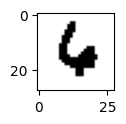

Actual Label: 6 , Predicted Label : 4


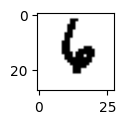

Actual Label: 8 , Predicted Label : 9


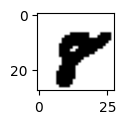

Actual Label: 8 , Predicted Label : 9


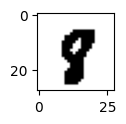

Actual Label: 8 , Predicted Label : 3


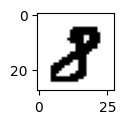

Actual Label: 4 , Predicted Label : 9


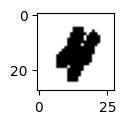

Actual Label: 7 , Predicted Label : 3


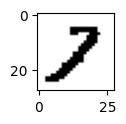

Actual Label: 4 , Predicted Label : 8


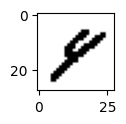

Actual Label: 5 , Predicted Label : 6


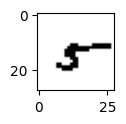

Actual Label: 9 , Predicted Label : 5


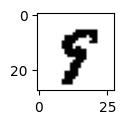

Actual Label: 2 , Predicted Label : 9


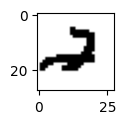

Actual Label: 2 , Predicted Label : 7


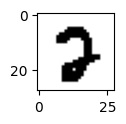

Actual Label: 2 , Predicted Label : 3


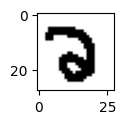

Actual Label: 2 , Predicted Label : 3


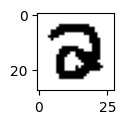

Actual Label: 1 , Predicted Label : 8


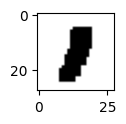

Actual Label: 1 , Predicted Label : 8


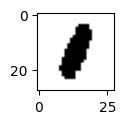

Actual Label: 5 , Predicted Label : 8


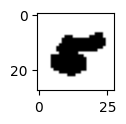

Actual Label: 1 , Predicted Label : 8


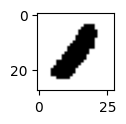

Actual Label: 1 , Predicted Label : 8


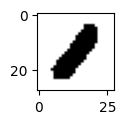

Actual Label: 5 , Predicted Label : 6


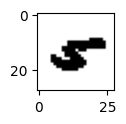

Actual Label: 2 , Predicted Label : 4


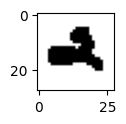

Actual Label: 1 , Predicted Label : 8


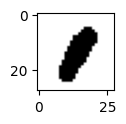

Actual Label: 5 , Predicted Label : 6


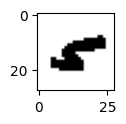

Actual Label: 1 , Predicted Label : 8


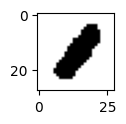

Actual Label: 1 , Predicted Label : 8


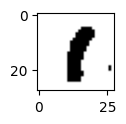

Actual Label: 2 , Predicted Label : 6


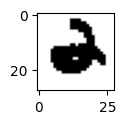

Actual Label: 1 , Predicted Label : 8


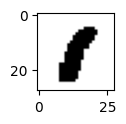

Actual Label: 1 , Predicted Label : 8


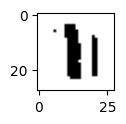

Actual Label: 5 , Predicted Label : 8


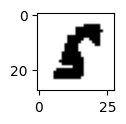

Actual Label: 4 , Predicted Label : 6


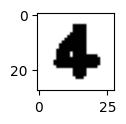

Actual Label: 2 , Predicted Label : 8


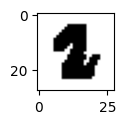

Actual Label: 2 , Predicted Label : 8


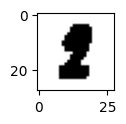

Actual Label: 4 , Predicted Label : 6


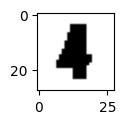

Actual Label: 3 , Predicted Label : 8


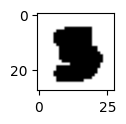

Actual Label: 8 , Predicted Label : 5


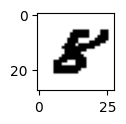

Actual Label: 3 , Predicted Label : 8


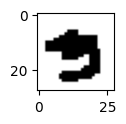

Actual Label: 3 , Predicted Label : 5


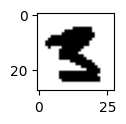

Actual Label: 3 , Predicted Label : 5


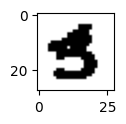

Actual Label: 8 , Predicted Label : 6


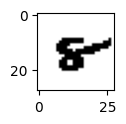

Actual Label: 4 , Predicted Label : 9


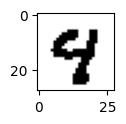

Actual Label: 8 , Predicted Label : 6


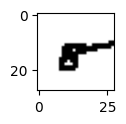

Actual Label: 8 , Predicted Label : 6


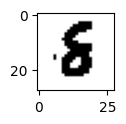

Actual Label: 1 , Predicted Label : 8


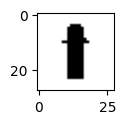

Actual Label: 1 , Predicted Label : 8


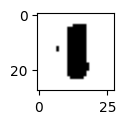

Actual Label: 4 , Predicted Label : 9


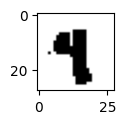

Actual Label: 8 , Predicted Label : 6


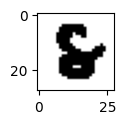

Actual Label: 4 , Predicted Label : 9


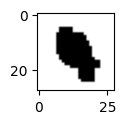

Actual Label: 7 , Predicted Label : 2


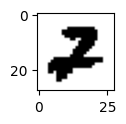

Actual Label: 7 , Predicted Label : 2


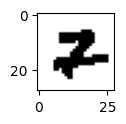

Actual Label: 7 , Predicted Label : 2


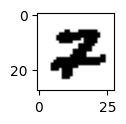

Actual Label: 7 , Predicted Label : 2


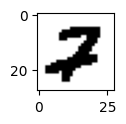

Actual Label: 7 , Predicted Label : 2


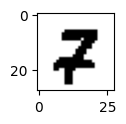

Actual Label: 7 , Predicted Label : 2


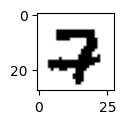

Actual Label: 1 , Predicted Label : 8


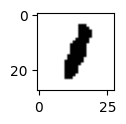

Actual Label: 1 , Predicted Label : 8


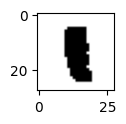

Actual Label: 4 , Predicted Label : 9


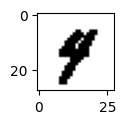

Actual Label: 8 , Predicted Label : 5


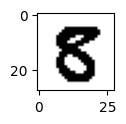

Actual Label: 5 , Predicted Label : 3


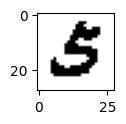

Actual Label: 9 , Predicted Label : 4


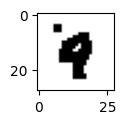

Actual Label: 1 , Predicted Label : 8


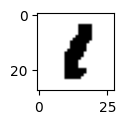

Actual Label: 0 , Predicted Label : 3


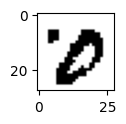

Actual Label: 9 , Predicted Label : 7


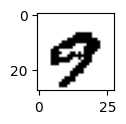

Actual Label: 1 , Predicted Label : 7


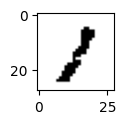

Actual Label: 2 , Predicted Label : 7


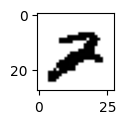

Actual Label: 6 , Predicted Label : 5


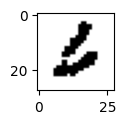

Actual Label: 6 , Predicted Label : 5


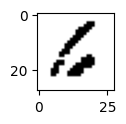

Actual Label: 2 , Predicted Label : 6


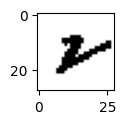

Actual Label: 2 , Predicted Label : 0


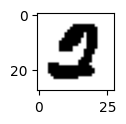

Actual Label: 5 , Predicted Label : 0


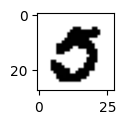

Actual Label: 5 , Predicted Label : 6


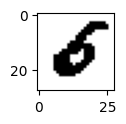

Actual Label: 4 , Predicted Label : 2


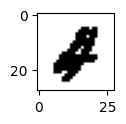

Actual Label: 5 , Predicted Label : 6


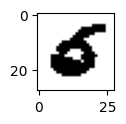

Actual Label: 2 , Predicted Label : 0


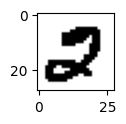

Actual Label: 2 , Predicted Label : 0


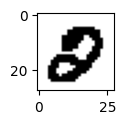

Actual Label: 5 , Predicted Label : 0


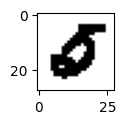

Actual Label: 5 , Predicted Label : 0


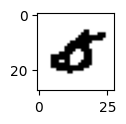

Actual Label: 2 , Predicted Label : 0


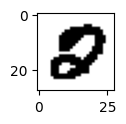

Actual Label: 4 , Predicted Label : 9


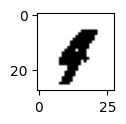

Actual Label: 9 , Predicted Label : 4


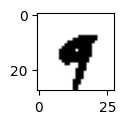

Actual Label: 2 , Predicted Label : 3


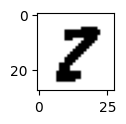

Actual Label: 2 , Predicted Label : 7


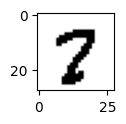

Actual Label: 9 , Predicted Label : 5


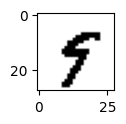

Actual Label: 6 , Predicted Label : 0


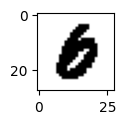

Actual Label: 3 , Predicted Label : 7


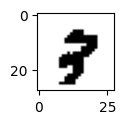

Actual Label: 3 , Predicted Label : 8


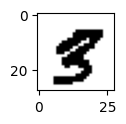

Actual Label: 3 , Predicted Label : 2


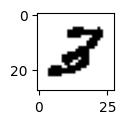

Actual Label: 5 , Predicted Label : 6


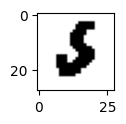

In [17]:
net.eval()

with torch.no_grad():
    for data in testloader:
        image,label = data
        images = image.to(device)
        labels = label.to(device)

        output = net(images)
        predictions = torch.argmax(output,dim=1)
        for i in range(data[0].shape[0]):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f"Actual Label: {label} , Predicted Label : {pred}")
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imgshow("",np.uint8(img),size=1)